Bayesian Campaign Update: Posterior Decision Thresholds

**Business Context:** In marketing and strategic decision-making, campaign performance is often uncertain. Bayesian updating allows decision-makers to revise beliefs about campaign success as new data arrives. This model simulates how posterior probabilities evolve and when to trigger decisions based on thresholds.

**Question:** Given uncertain campaign performance, how should we update our belief and decide whether to continue, pause, or scale a campaign?

**Approach:**
- Use Bayesian updating with a Beta prior and Binomial likelihood
- Simulate campaign performance data (e.g., conversions)
- Track posterior mean and credible intervals
- Define decision thresholds for action

 **Keywords:** Bayesian inference, posterior update, decision thresholds, campaign optimisation


In [ ]:
# --- Notebook Setup & Imports ---

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# --- Parameters ---
PRIOR_ALPHA = 2    
PRIOR_BETA = 2   
TRUE_CONVERSION_RATE = 0.05
N_OBSERVATIONS = 1000
DECISION_THRESHOLD_CONTINUE = 0.04
DECISION_THRESHOLD_SCALE = 0.07

# --- Simulate Campaign Data ---

np.random.seed(42)
data = np.random.binomial(1, TRUE_CONVERSION_RATE, N_OBSERVATIONS)

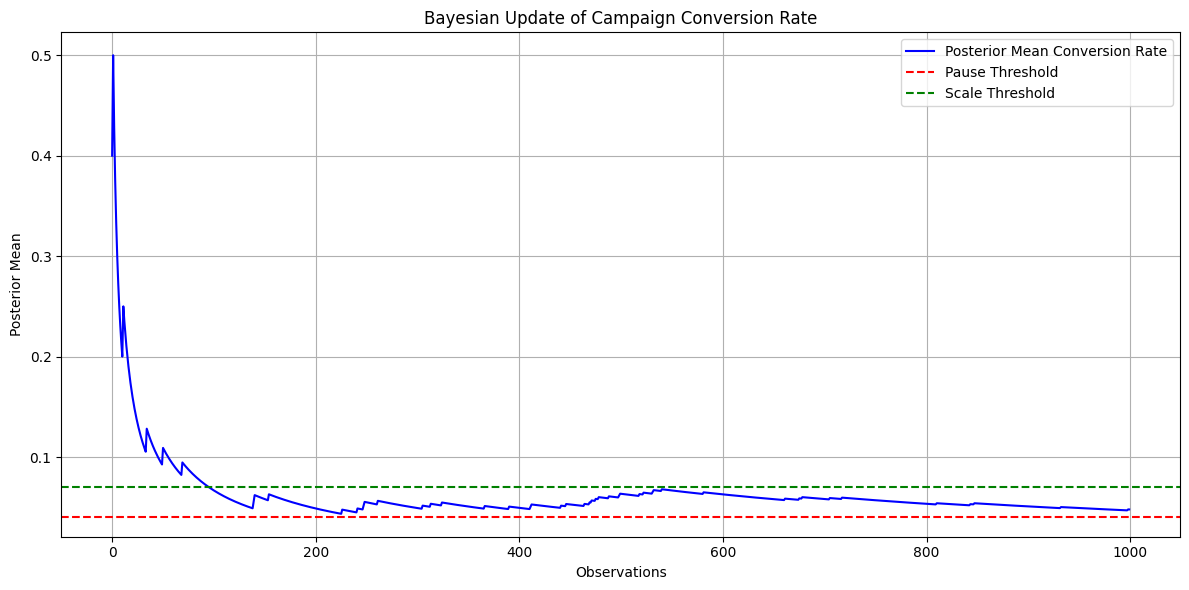

Decision Summary:
Scale: 95 observations
Continue: 905 observations


In [ ]:
# --- Bayesian Update Function ---

def bayesian_update(prior_alpha, prior_beta, data):
    post_alpha = prior_alpha + np.cumsum(data)
    post_beta = prior_beta + np.cumsum(1 - data)
    return post_alpha, post_beta

# --- Run Update ---

posterior_alpha, posterior_beta = bayesian_update(PRIOR_ALPHA, PRIOR_BETA, data)
posterior_mean = posterior_alpha / (posterior_alpha + posterior_beta)

# --- Decision Logic ---

decision = np.where(
    posterior_mean < DECISION_THRESHOLD_CONTINUE, 'Pause',
    np.where(posterior_mean > DECISION_THRESHOLD_SCALE, 'Scale', 'Continue')
)

# --- Plot Posterior Mean & Decisions ---

plt.figure(figsize=(12, 6))
plt.plot(posterior_mean, label='Posterior Mean Conversion Rate', color='blue')
plt.axhline(DECISION_THRESHOLD_CONTINUE, color='red', linestyle='--', label='Pause Threshold')
plt.axhline(DECISION_THRESHOLD_SCALE, color='green', linestyle='--', label='Scale Threshold')
plt.title('Bayesian Update of Campaign Conversion Rate')
plt.xlabel('Observations')
plt.ylabel('Posterior Mean')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Decision Summary ---

from collections import Counter
decision_summary = Counter(decision)
print("Decision Summary:")
for k, v in decision_summary.items():
    print(f"{k}: {v} observations")


--- Executive Summary & Strategic Recommendation ---

**Strategic Insight:**

- **Bayesian** updating enables real-time belief revision As campaign data accumulates, posterior estimates of conversion rates become more reliable 
- **Decision** thresholds guide agile campaign control Posterior mean crossing predefined thresholds triggers pause, continue, or scale actions
- **Credible** intervals shrink with more data Uncertainty reduces over time, allowing for more confident decisions 
- **Recommendation** Implement Bayesian monitoring for all high-stakes campaigns This ensures timely interventions and minimizes wasted spend  

**Actionable Guidance:**
- Use Beta-Binomial models to update conversion beliefs dynamically 
- Define clear thresholds for pausing (< θ₁), continuing (θ₁ ≤ p ≤ θ₂), and scaling (> θ₂)  
- Visualise posterior mean and credible intervals in dashboards
- Prioritise early data collection to reduce decision uncertainty 
